<a href="https://colab.research.google.com/github/prime-programmer/Hotel-time-series-/blob/main/Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


In [2]:
import pandas as pd

# 1. Load Data
df = pd.read_csv('hotel_bookings.csv')

## Data Inspection

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

reservation_status_date is an anomaly. It has an object data type when it should be a date data type

In [5]:
print(df.shape)

(119390, 32)


We have 119390 rows and 32 columns in the dataset

## Data Cleaning

### Missing Values

In [6]:
#Percentage of missing values by column

round((df.isnull().sum().sort_values(ascending = False) * 100) / len(df), 2)

,0
company,94.31
agent,13.69
country,0.41
children,0.00
arrival_date_month,0.00
arrival_date_week_number,0.00
hotel,0.00
is_canceled,0.00
stays_in_weekend_nights,0.00
arrival_date_day_of_month,0.00


Company and agent have a high amount of missing data. However according to the original article https://www.sciencedirect.com/science/article/pii/S2352340918315191 NULL values in categorical variables like agent or company should be treated as missing values. In that case, I will replace the null values with 0 for the company and agent and for country I will replace with Unknown to avoid introducing bias in my model

In [7]:
#Replacing NULL values in company and agent columns with 0

values = {'company': 0, 'agent': 0}

df.fillna(value = values, inplace = True)


# Replace NULL values with Unknown
df['country'] = df['country'].fillna('Unknown')


#Removing row affected by NULL values in children column

df.dropna(subset = ['children'], inplace = True)

In [8]:
#Rechecking for NULL values in the data set

print(f"Missing values remaining: {df.isnull().sum().sum()}")

Missing values remaining: 0


There are no more missing values

### Inconsistent data

In [9]:
# Categorical columns

cat_columns = ['hotel', 'is_canceled', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']


# Unique values in each categorical column

print(f"Unique values by categorical columns\n".upper())

for cat_column in cat_columns:
    unique_values = df[cat_column].unique()
    print(f"\n{cat_column}: \n{unique_values}\n")
    print('-' * 70)

UNIQUE VALUES BY CATEGORICAL COLUMNS


hotel: 
['Resort Hotel' 'City Hotel']

----------------------------------------------------------------------

is_canceled: 
[0 1]

----------------------------------------------------------------------

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

----------------------------------------------------------------------

country: 
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'Unknown' 'ROU' 'NOR' 'OMN' 'ARG'
 'POL' 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS'
 'EST' 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX'
 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF'
 'AGO' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN'
 'JAM' 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL'
 'GGY' 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL'
 'SEN' 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA'
 'CUB' 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CI

We can see from the data above that the column "meal" has value of 'Undefined'. There is no food called undefined so I replace it with SC

In [10]:
#Replacing 'undefined' meal with 'SC'

df['meal'].replace(to_replace = 'Undefined', value = 'SC', inplace = True)

/tmp/ipython-input-331687437.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['meal'].replace(to_replace = 'Undefined', value = 'SC', inplace = True)


In [11]:
#Rechecking unique values in meal column

df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [12]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,0.370395,104.014801,2016.156593,27.165003,15.798553,0.927605,2.500310,1.856390,0.103890,0.007949,0.031913,0.087121,0.137102,0.221131,74.830633,10.775518,2.321227,101.833541,0.062520,0.571340
std,0.482913,106.863286,0.707456,13.605334,8.780783,0.998618,1.908289,0.579261,0.398561,0.097438,0.175770,0.844350,1.497462,0.652315,107.142996,53.944751,17.595011,50.534664,0.245295,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.590000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [13]:
#Dropping rows with 0 adults

df.drop(df[df['adults'] == 0].index, inplace = True)

In [14]:
#Verification

len(df[df['adults'] == 0])

0

#2. Data Preparation
### Outliers
We know

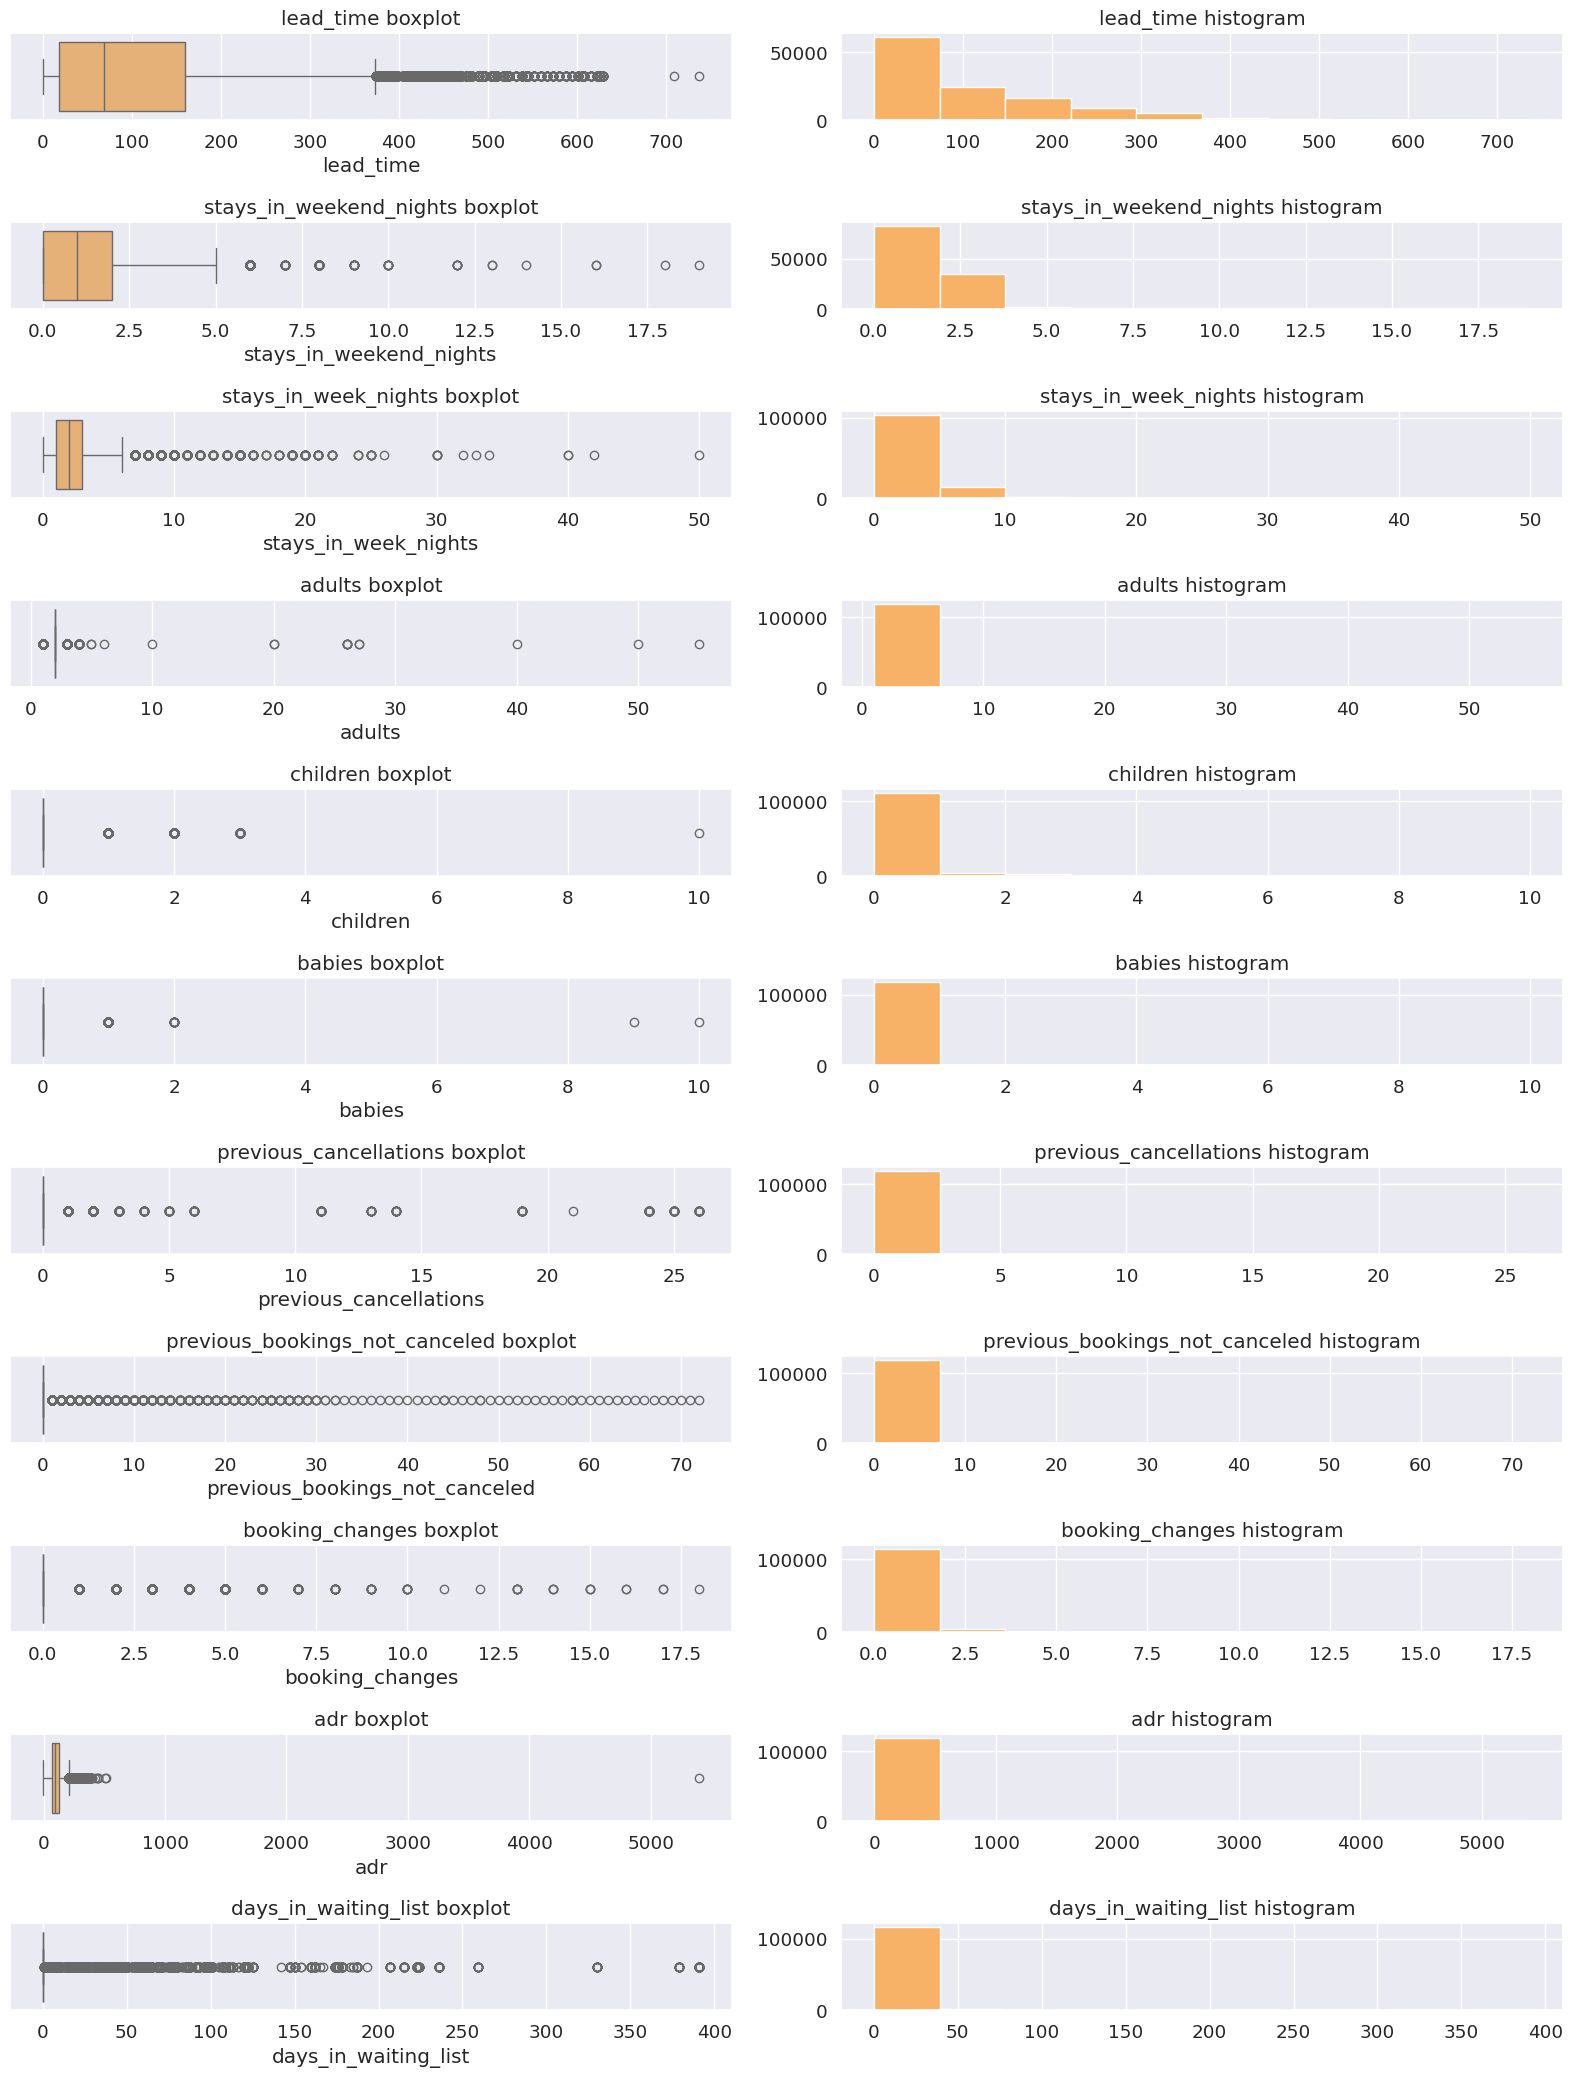

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

features = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
    'children', 'babies', 'previous_cancellations',
    'previous_bookings_not_canceled', 'booking_changes', 'adr',
    'days_in_waiting_list'
]

sns.set_style('darkgrid')
sns.set(font_scale=1.2)
plt.figure(figsize=(16, 28))

n = 1

for feature in features:

    # --- Horizontal Boxplot ---
    plt.subplot(15, 2, n)
    sns.boxplot(x=df[feature], color='#f7b267')
    plt.title(f'{feature} boxplot')
    n += 1

    # --- Histogram ---
    plt.subplot(15, 2, n)
    plt.hist(df[feature], color='#f7b267')
    plt.title(f'{feature} histogram')
    n += 1

plt.tight_layout()
plt.show()


I cleaned my dataset by removing the adr outlier, negative prices (impossible) and ghost bookings (rooms without an adult. Legally, a room cannot be occupied by 0 adults). This is a system error.


Data Cleaned. Capped Lead Time at 444 and ADR at 252


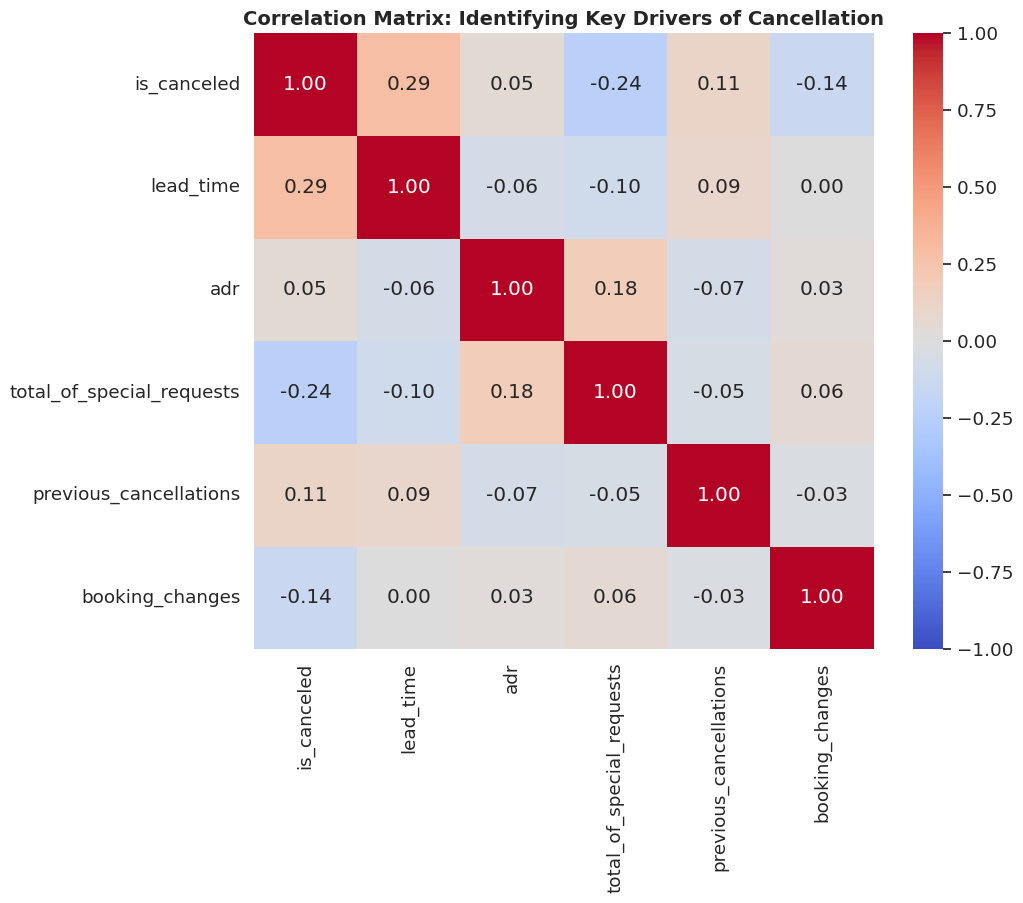

/tmp/ipython-input-2513179510.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='lead_time', data=df, palette='Set2')


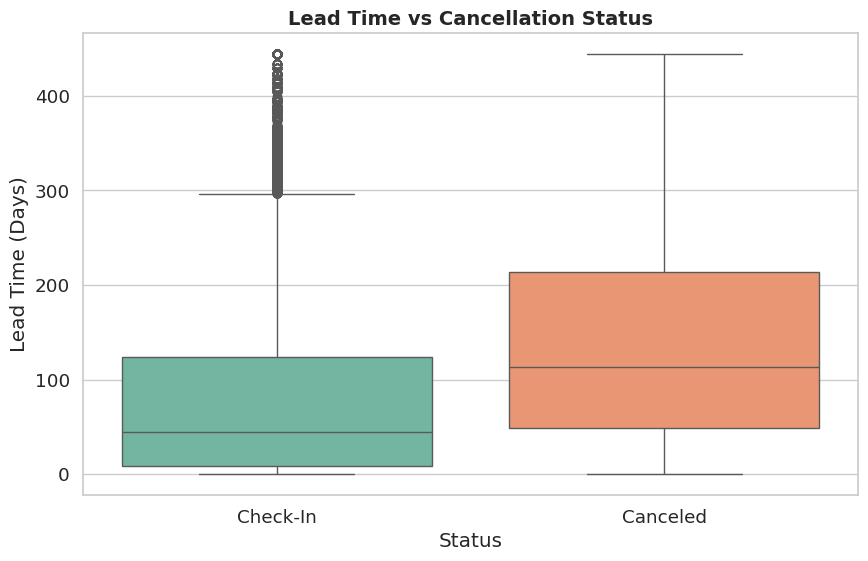

/tmp/ipython-input-2513179510.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='market_segment', y='adr', data=df_clean, palette='muted')


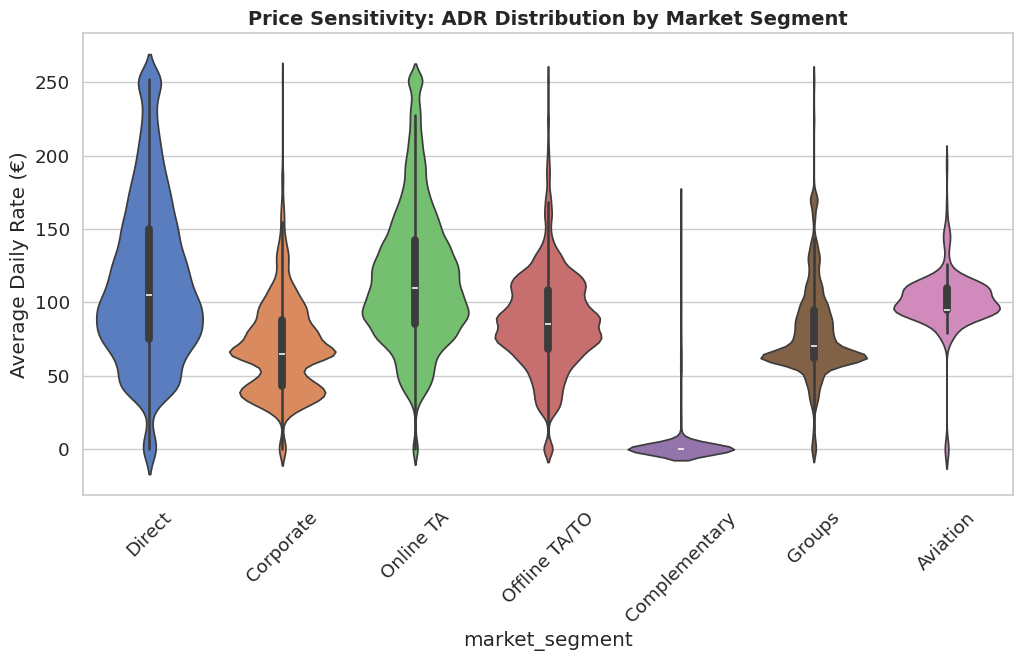

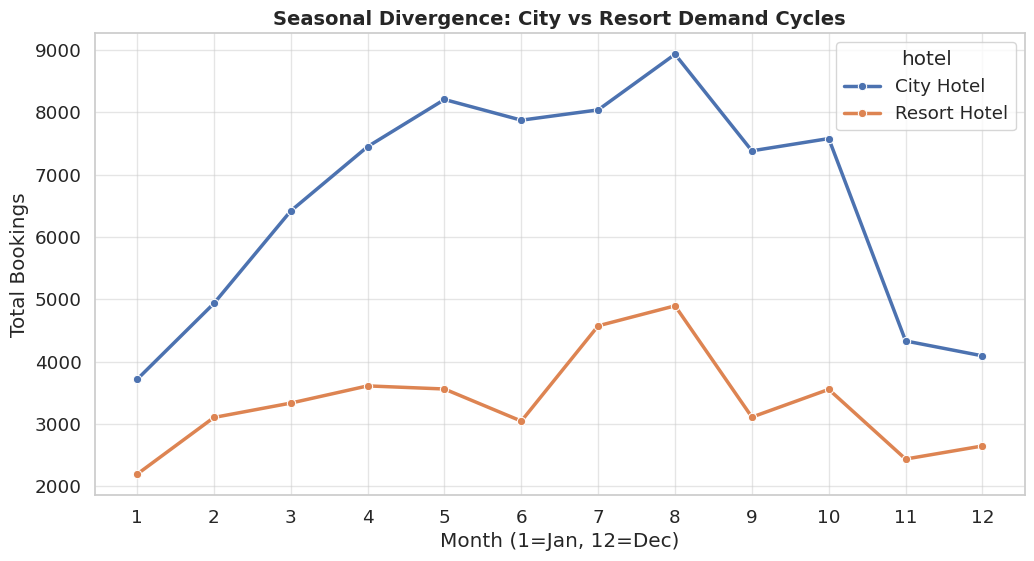

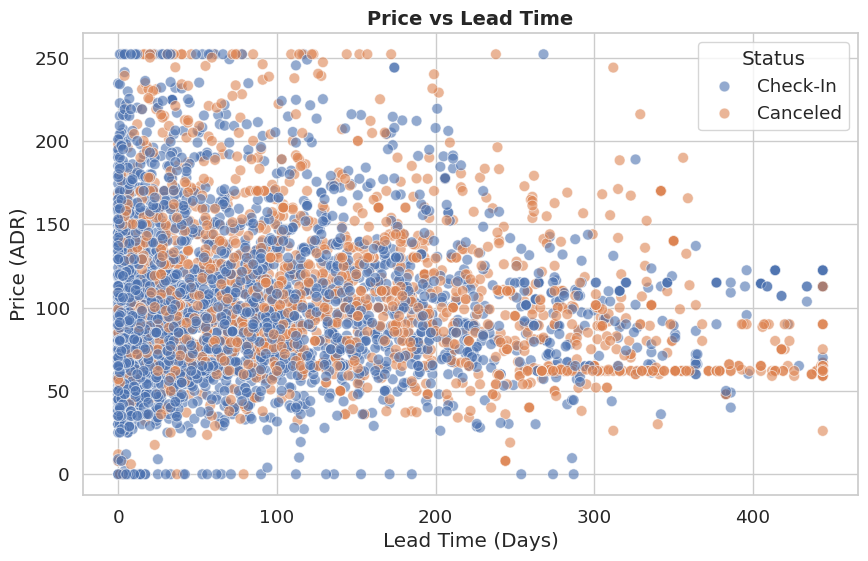

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# OUTLIER CLEANING
# ADR error
df = df[df['adr'] < 5000].copy()

# Cap Lead Time at 99th percentile (~380 days)
# Why? Because a 700-day lead time is an anomaly that squashes your boxplot.
cap_lead = df['lead_time'].quantile(0.99)
df.loc[df['lead_time'] > cap_lead, 'lead_time'] = cap_lead

# Cap ADR at 99th percentile (~250 EUR)
# Why? To stop extreme luxury suites from distorting the scatter plot.
cap_adr = df['adr'].quantile(0.99)
df.loc[df['adr'] > cap_adr, 'adr'] = cap_adr

print(f"Data Cleaned. Capped Lead Time at {cap_lead:.0f} and ADR at {cap_adr:.0f}")

# 2. Remove "Ghost" Bookings (0 Adults)
# Legally, a room cannot be occupied by 0 adults. This is a system error.
df = df[df['adults'] > 0]

# 3. Handle Negative Prices (Refunds/Errors)
df = df[df['adr'] >= 0]

# Create clean labels for plotting
df['Status'] = df['is_canceled'].map({0: 'Check-In', 1: 'Canceled'})
# Create explicit Month column for seasonality
month_map = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
             'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df['Month_Num'] = df['arrival_date_month'].map(month_map)

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


# FIG 1: Correlation Heatmap
# Shows relationships between variables.
plt.figure(figsize=(10, 8))
cols = ['is_canceled', 'lead_time', 'adr', 'total_of_special_requests',
        'previous_cancellations', 'booking_changes']
corr = df[cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix: Identifying Key Drivers of Cancellation', fontsize=14, fontweight='bold')
plt.show()

#USE CASE: SURVIVAL ANALYSIS
# FIG 2: Box Plot
# Shows that Cancellations (Orange) happen when Lead Time is high.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='lead_time', data=df, palette='Set2')
plt.title('Lead Time vs Cancellation Status', fontsize=14, fontweight='bold')
plt.ylabel('Lead Time (Days)')
plt.show()

# FIG 3: Violin Plot (Market Segmentation)
# Shows that "Online TA" and "Direct" customers pay very different prices.
df_clean = df[df['adr'] < 400]
plt.figure(figsize=(12, 6))
sns.violinplot(x='market_segment', y='adr', data=df_clean, palette='muted')
plt.title('Price Sensitivity: ADR Distribution by Market Segment', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Average Daily Rate (€)')
plt.show()

# FIG 4: Seasonal Line Plot (The "Split" Justification)
# Shows why we MUST model City and Resort separately (They peak at different times).
seasonal_data = df.groupby(['Month_Num', 'hotel'])['is_canceled'].count().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month_Num', y='is_canceled', hue='hotel', data=seasonal_data, marker='o', linewidth=2.5)
plt.title('Seasonal Divergence: City vs Resort Demand Cycles', fontsize=14, fontweight='bold')
plt.xlabel('Month (1=Jan, 12=Dec)')
plt.ylabel('Total Bookings')
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.5)
plt.show()

# FIG 5: Multivariate Scatter Plot (The "Interaction")
# Shows High Lead Time + High Price = High Cancellation Risk.
df_sample = df_clean.sample(5000, random_state=42)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lead_time', y='adr', hue='Status', data=df_sample, alpha=0.6, s=60)
plt.title('Price vs Lead Time', fontsize=14, fontweight='bold')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Price (ADR)')
plt.legend(title='Status', loc='upper right')
plt.show()

In [17]:
# Total nights per booking

df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

# Dataset with canceled bookings only

canceled_bookings = df[df['is_canceled'] == 1]

# Dataset with confirmed bookings only

confirmed_bookings = df[df['is_canceled'] == 0]
confirmed_bookings_int = df[df['is_canceled'] == 0]

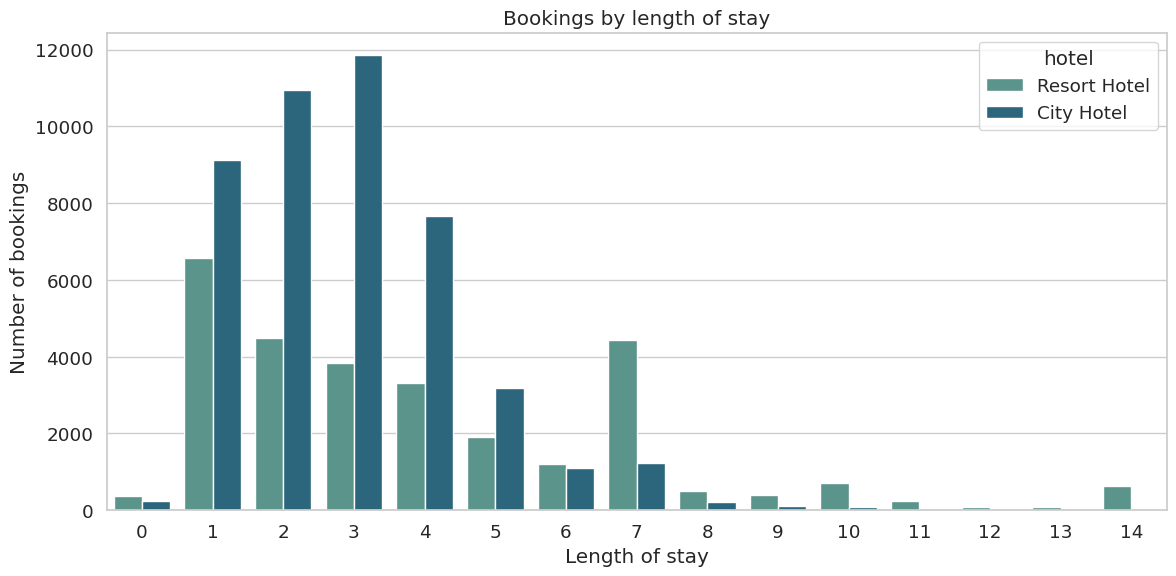

In [18]:
plt.figure(figsize = (12, 6))
plot_data = confirmed_bookings_int[confirmed_bookings_int['total_nights'] < 15]
sns.countplot(x = 'total_nights', data = plot_data, hue = 'hotel', palette = 'crest')
plt.title('Bookings by length of stay')
plt.xlabel('Length of stay')
plt.ylabel('Number of bookings')

plt.tight_layout()

/tmp/ipython-input-3636288876.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x = 'arrival_date_month', y = 'adr', hue = 'hotel', data = confirmed_bookings, ci = 'sd', palette = 'viridis', alpha = 0.6)


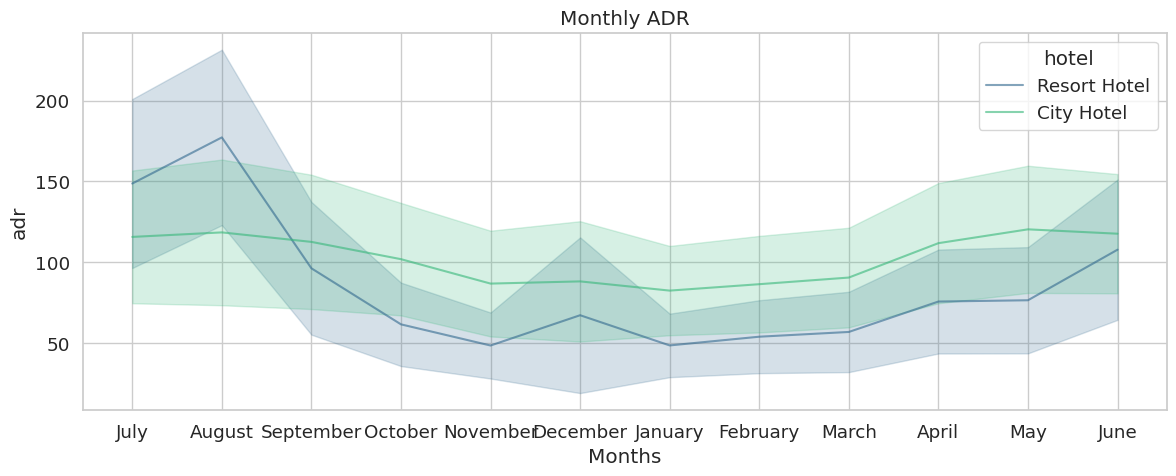

In [19]:
plt.figure(figsize = (12, 5))

months = confirmed_bookings['arrival_date_month'].unique()

sns.lineplot(x = 'arrival_date_month', y = 'adr', hue = 'hotel', data = confirmed_bookings, ci = 'sd', palette = 'viridis', alpha = 0.6)
plt.title('Monthly ADR')
plt.xlabel('Months')
plt.xticks(ticks = [m for m in months])

plt.tight_layout()

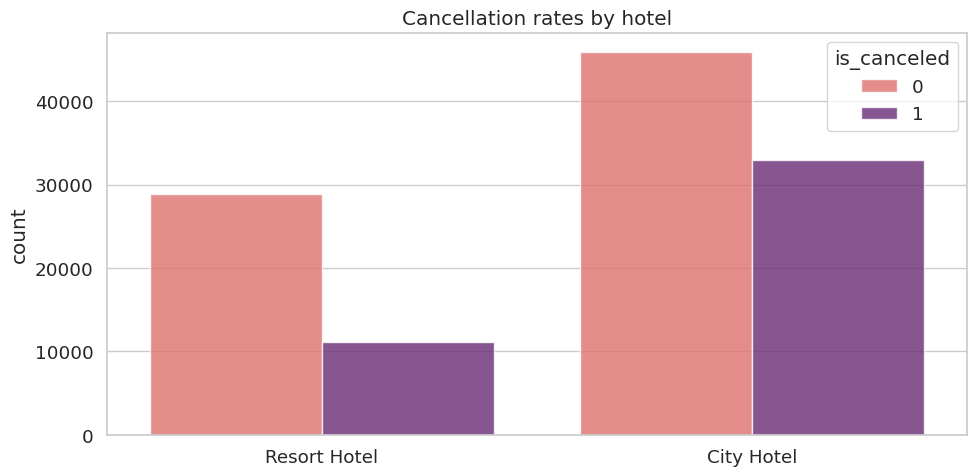

In [20]:
plt.figure(figsize = (10, 5))

sns.countplot(x = 'hotel', data = df, hue = 'is_canceled', palette = 'magma_r', alpha = 0.8).set(xlabel = None)
plt.title('Cancellation rates by hotel')

plt.tight_layout()

/tmp/ipython-input-2765631381.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax = ax, y = 'deposit_type', data = canceled_bookings, orient = "h" ,palette = 'BuPu').set(ylabel = None)


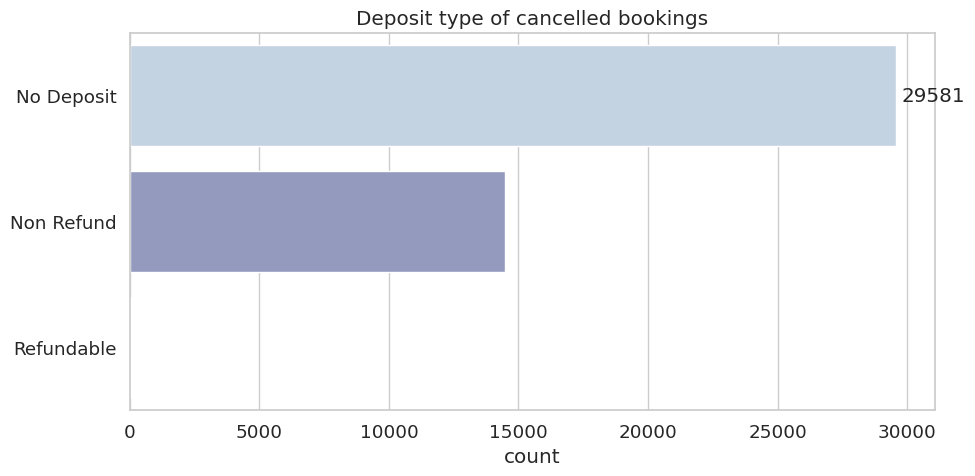

In [21]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.countplot(ax = ax, y = 'deposit_type', data = canceled_bookings, orient = "h" ,palette = 'BuPu').set(ylabel = None)
ax.bar_label(ax.containers[0], padding = 4)
plt.title('Deposit type of cancelled bookings')

plt.tight_layout()

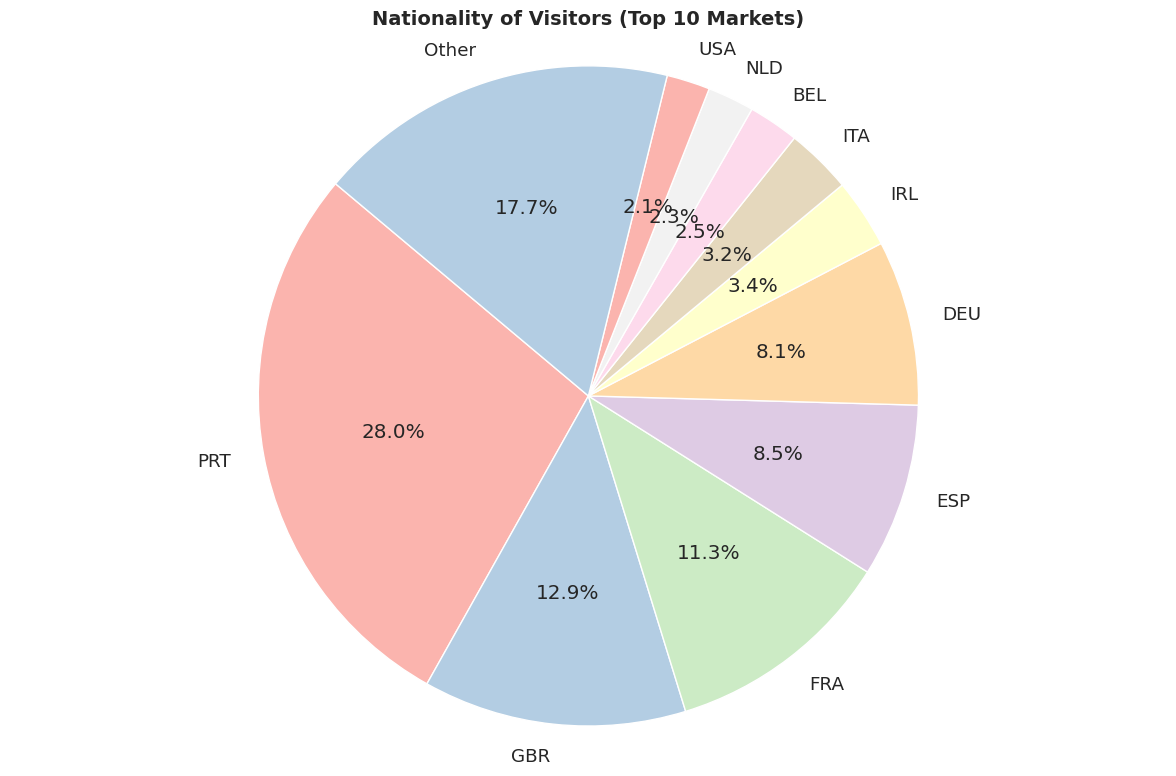

In [22]:
df['is_canceled'] = pd.to_numeric(df['is_canceled'], errors='coerce')
country_counts = df[df['is_canceled'] == 0]['country'].value_counts()

# Group for Pie Chart
top_10 = country_counts.head(10)
other_count = country_counts.iloc[10:].sum()
# Create a new series for plotting
plot_data = top_10.copy()
plot_data['Other'] = other_count

# Plot
plt.figure(figsize=(12, 8))
plt.pie(plot_data, labels=plot_data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Nationality of Visitors (Top 10 Markets)', fontsize=14, fontweight='bold')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

plt.show()

# Stationarity Analysis (ADF Test) and Autocorrelation

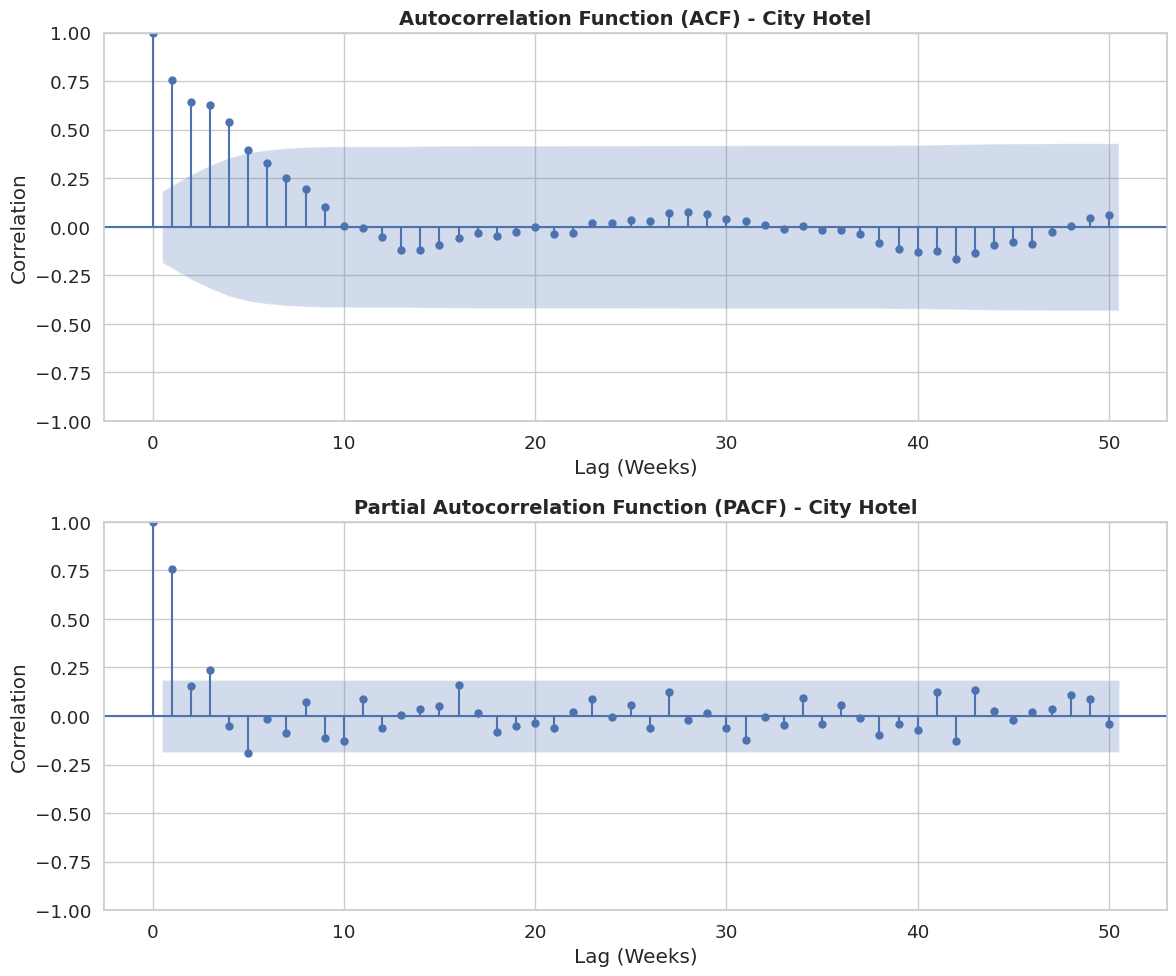

ADF Statistic: -2.4649608692344
p-value: 0.12423410977436677
Conclusion: The time series is NON-STATIONARY (p > 0.05).
It has a trend/seasonality and requires differencing (d=1) before modeling.


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Create Date Column
month_map = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
             'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df['month_num'] = df['arrival_date_month'].map(month_map)
df['date'] = pd.to_datetime(df.assign(year=df['arrival_date_year'],
                                              month=df['month_num'],
                                              day=df['arrival_date_day_of_month'])[
                                    ['year', 'month', 'day']])

# Filter for City Hotel & Aggregate to Weekly
city_df = df[df['hotel'] == 'City Hotel'].copy()
weekly_ts = city_df.set_index('date').resample('W').size()

# Group by Date to get Total Monthly Bookings
ts_total = df.groupby('date').size()

# Run Augmented Dickey-Fuller Test
result = adfuller(ts_total)


# Generate ACF and PACF Plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# ACF: AutoCorrelation Function
# Shows correlation with past values (Lags). Helps determine MA (q) terms.
plot_acf(weekly_ts, ax=ax1, lags=50) # Changed lags from 60 to 50
ax1.set_title('Autocorrelation Function (ACF) - City Hotel', fontsize=14, fontweight='bold')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lag (Weeks)')

# PACF: Partial AutoCorrelation Function
# Shows direct correlation removing intermediate lags. Helps determine AR (p) terms.
plot_pacf(weekly_ts, ax=ax2, lags=50, method='ywm') # Changed lags from 60 to 50
ax2.set_title('Partial Autocorrelation Function (PACF) - City Hotel', fontsize=14, fontweight='bold')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lag (Weeks)')

plt.tight_layout()
plt.savefig('acf_pacf_plots.png')
plt.show()

# Print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Print Interpretation
if result[1] > 0.05:
    print("Conclusion: The time series is NON-STATIONARY (p > 0.05).")
    print("It has a trend/seasonality and requires differencing (d=1) before modeling.")
else:
    print("Conclusion: The time series is STATIONARY (p < 0.05).")


I am going to split the dataset because from the above seasonal divergence plot we can see the cycles of the city and resort hotels. It is necessary yot do this to avoid signal mix up when training the model

In [25]:
#  Create the Split Dataset (City vs Resort)
def get_hotel_weekly(df, hotel_type):
    # Filter
    subset = df[df['hotel'] == hotel_type].copy()
    subset.set_index('date', inplace=True)

    # Resample Weekly
    weekly = subset.resample('W').agg({
        'hotel': 'count',
        'adr': 'mean',
        'lead_time': 'mean',
        'is_canceled': 'mean'
    })
    # Rename with prefix
    prefix = hotel_type.split()[0] # "City" or "Resort"
    weekly.columns = [f'{prefix}_Bookings', f'{prefix}_ADR', f'{prefix}_LeadTime', f'{prefix}_CancelRate']
    return weekly

# Generate the two series
city_weekly = get_hotel_weekly(df, 'City Hotel')
resort_weekly = get_hotel_weekly(df, 'Resort Hotel')

# Merge them into one Master Dataset
split_df = pd.concat([city_weekly, resort_weekly], axis=1)

# Fill NaNs (if any weeks have 0 bookings for one hotel type but not the other)
split_df.fillna(0, inplace=True)

In [26]:
# Save
split_df.to_csv('weekly_hotel_split.csv')

In [27]:
# EDA for new dataset
print("New Split Dataset Generated (First 5 rows):")
print(split_df.head())
print(split_df.info())

New Split Dataset Generated (First 5 rows):
            City_Bookings   City_ADR  City_LeadTime  City_CancelRate  \
date                                                                   
2015-07-05            190  77.674158     215.694737         0.552632   
2015-07-12            224  71.252366     181.049107         0.727679   
2015-07-19            341  73.687625     186.733138         0.636364   
2015-07-26            450  66.684667     166.764444         0.706667   
2015-08-02            232  65.046336     154.974138         0.668103   

            Resort_Bookings  Resort_ADR  Resort_LeadTime  Resort_CancelRate  
date                                                                         
2015-07-05              222  101.287297        80.626126           0.220721  
2015-07-12              271  113.088155        88.719557           0.177122  
2015-07-19              343  128.377726        65.673469           0.262391  
2015-07-26              311  141.714341        57.501608     

#3. Modelling
Test our models - SARIMA, SARIMAX and TRANSFORMERS with attention - to see and compare what their performance is
### SARIMA
For SARIMA I used pmdarima to perform a stepwise AIC minimization search, identifying the optimal configuration which was fed to model for robust perfomance

In [28]:
# Install library
!pip install pmdarima

#Import libraries
import pmdarima as pm
import pandas as pd

# Load your data
df = pd.read_csv('weekly_hotel_split.csv')
df['date'] = pd.to_datetime(df['date'])
train = df.iloc[:-20] # Use only training data to find params

print("Starting Auto-ARIMA search...")

# We set m=52 for weekly data.
sarima_model = pm.auto_arima(
    train['City_Bookings'],
    start_p=1, max_p=3,
    start_q=1, max_q=3,
    start_P=0, max_P=2,
    start_Q=0, max_Q=2,
    d=1,
    D=1,
    m=52,
    seasonal=True,
    stepwise=True,     # Smart search
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)

print("\nBest Model Found:")
print(sarima_model.summary())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 14.2 MB/s eta 0:00:00
Starting Auto-ARIMA search...
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[52]             : AIC=533.062, Time=1.16 sec
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=534.250, Time=0.43 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=inf, Time=11.80 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=9.81 sec
 ARIMA(1,1,1)(1,1,0)[52]             : AIC=533.696, Time=16.37 sec
 ARIMA(1,1,1)(0,1,1)[52]             : AIC=inf, Time=12.89 sec
 ARIMA(1,1,1)(1,1,1)[52]             : AIC=535.690, Time=17.34 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=532.294, Time=0.59 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=532.930, Time=12.28 sec
 ARIMA(0,1,1)(1,1,1)[52]             : AIC=534.928, Time=14.91 sec
 ARIMA(0,1,2)(0,1,0)[52]             : AIC=533.715, Time=0.85 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=533.505, Time=0.53 sec
 ARIMA(1,1,2)(0,1,0)[52]             : AIC=535.650, Time=1.3

Training SARIMA (Baseline)...


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


SARIMA MAPE (Error Rate): 18.15%
SARIMA RMSE: 159.35


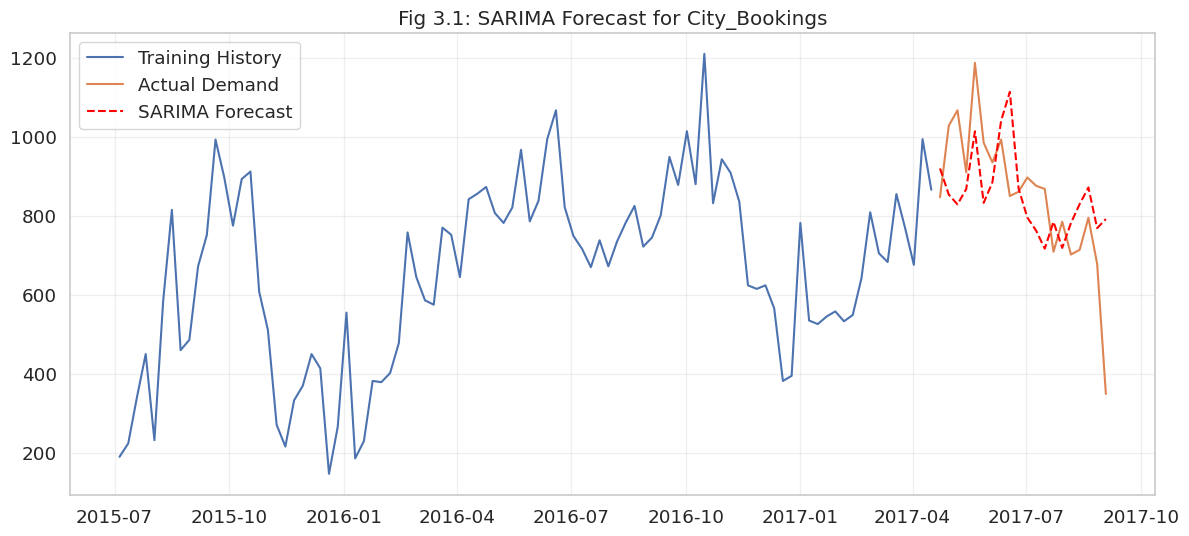

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Load split dataset
df = pd.read_csv('weekly_hotel_split.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Select Target (City Hotel)
#train/test split (Last 20 weeks for testing)
target_col = 'City_Bookings'
train = df.iloc[:-20]
test = df.iloc[-20:]

# Configure and Train SARIMA
# Use Best model:  ARIMA(0,1,1)(0,1,0)[52]
print("Training SARIMA (Baseline)...")
model = SARIMAX(train[target_col],
                order=(0, 1, 1),
                seasonal_order=(0, 1, 0, 52),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Forecast
# We predict the next 20 steps
forecast = results.get_forecast(steps=len(test))
predicted_mean = forecast.predicted_mean
predicted_mean.index = test.index  # Align dates

# Evaluation
mape = mean_absolute_percentage_error(test[target_col], predicted_mean)
rmse = np.sqrt(mean_squared_error(test[target_col], predicted_mean)) # Calculate RMSE
print(f"SARIMA MAPE (Error Rate): {mape:.2%}")
print(f"SARIMA RMSE: {rmse:.2f}")

#  Plot
plt.figure(figsize=(14, 6))
plt.plot(train.index, train[target_col], label='Training History')
plt.plot(test.index, test[target_col], label='Actual Demand')
plt.plot(test.index, predicted_mean, label='SARIMA Forecast', color='red', linestyle='--')
plt.title(f'Fig 3.1: SARIMA Forecast for {target_col}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [30]:
# Uninstall any conflicting old versions to clear the slate
!pip uninstall -y pytorch-lightning pytorch-forecasting lightning

# Install the modern versions (No specific version numbers = Auto-match)
!pip install -q lightning pytorch-forecasting pandas numpy matplotlib

print("Installation Complete. Please proceed to the Model Code.")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 846.0/846.0 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 391.5/391.5 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.5/849.5 kB 15.2 MB/s eta 0:00:00
Installation Complete. Please proceed to the Model Code.


Training SARIMAX (Linear Multivariate)...


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


SARIMAX MAPE: 18.27%
SARIMAX RMSE: 161.46


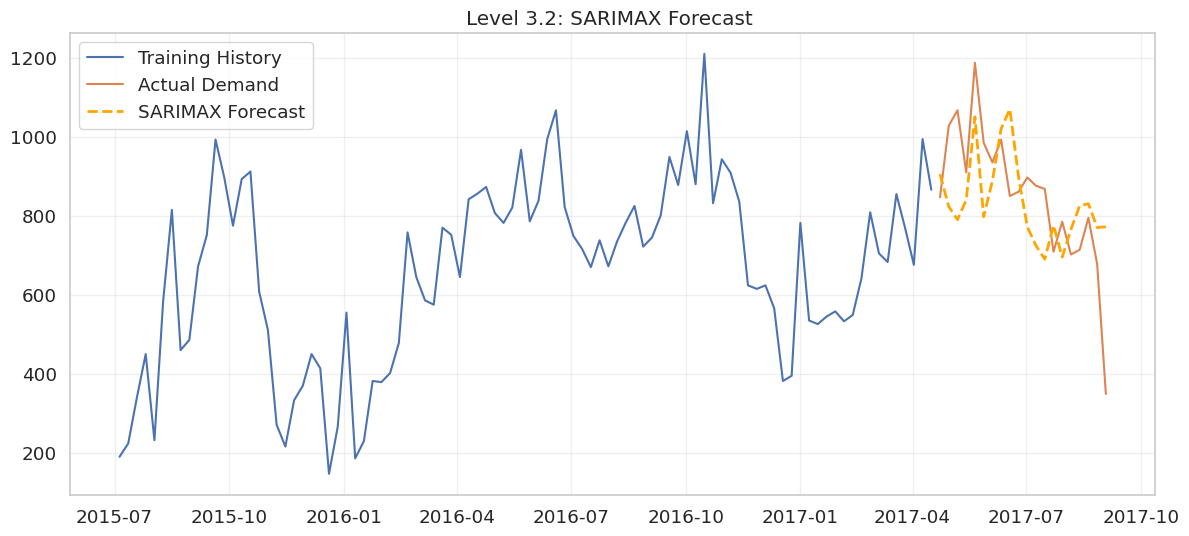


Model Coefficients (Linear Elasticity):
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
City_ADR          3.9149      2.742      1.428      0.153      -1.459       9.289
City_LeadTime     0.8122      0.868      0.936      0.349      -0.889       2.513
ma.L1            -0.3762      0.131     -2.876      0.004      -0.633      -0.120
sigma2         2.129e+04   5858.163      3.634      0.000    9805.578    3.28e+04


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Load Data
df = pd.read_csv('weekly_hotel_split.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Configure SARIMAX
# Target: City_Bookings
# Exogenous: City_ADR (Price), City_LeadTime (Planning)
target_col = 'City_Bookings'
exog_cols = ['City_ADR', 'City_LeadTime']

# Train/Test Split
train = df.iloc[:-20]
test = df.iloc[-20:]

# Train SARIMAX

print("Training SARIMAX (Linear Multivariate)...")
model = SARIMAX(train[target_col],
                exog=train[exog_cols],
                order=(0, 1, 1),
                seasonal_order=(0, 1, 0, 52),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Forecast

forecast = results.get_forecast(steps=len(test), exog=test[exog_cols])
predicted_mean = forecast.predicted_mean
predicted_mean.index = test.index

# Evaluate
mape = mean_absolute_percentage_error(test[target_col], predicted_mean)
rmse = np.sqrt(mean_squared_error(test[target_col], predicted_mean))

print(f"SARIMAX MAPE: {mape:.2%}")
print(f"SARIMAX RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(train.index, train[target_col], label='Training History')
plt.plot(test.index, test[target_col], label='Actual Demand')
plt.plot(test.index, predicted_mean, label='SARIMAX Forecast', color='orange', linestyle='--', linewidth=2)
plt.title(f'Level 3.2: SARIMAX Forecast ')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print Coefficients (To show Linear Price Elasticity)
print("\nModel Coefficients (Linear Elasticity):")
print(results.summary().tables[1])

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42


Starting Championship Search across 5 seeds...
--------------------------------------------------


/usr/local/lib/python3.12/dist-packages/lightning/pytorch/utilities/parsing.py:210: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/utilities/parsing.py:210: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/loops/fit_loop.py:317: The number of training batches (3) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/utilities/parsing.py:210: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommen

Seed 42: MAPE = 21.35%


/usr/local/lib/python3.12/dist-packages/lightning/pytorch/utilities/parsing.py:210: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/utilities/parsing.py:210: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/loops/fit_loop.py:317: The number of training batches (3) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/utilities/parsing.py:210: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommen

Seed 123: MAPE = 19.48%


/usr/local/lib/python3.12/dist-packages/lightning/pytorch/utilities/parsing.py:210: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/utilities/parsing.py:210: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/loops/fit_loop.py:317: The number of training batches (3) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/utilities/parsing.py:210: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommen

Seed 777: MAPE = 28.11%


/usr/local/lib/python3.12/dist-packages/lightning/pytorch/utilities/parsing.py:210: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/utilities/parsing.py:210: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/loops/fit_loop.py:317: The number of training batches (3) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/utilities/parsing.py:210: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommen

Seed 2024: MAPE = 20.27%


/usr/local/lib/python3.12/dist-packages/lightning/pytorch/utilities/parsing.py:210: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/utilities/parsing.py:210: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/loops/fit_loop.py:317: The number of training batches (3) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/utilities/parsing.py:210: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommen

Seed 88: MAPE = 20.96%
 Best Seed 123 with MAPE is 19.48%


/usr/local/lib/python3.12/dist-packages/lightning/pytorch/utilities/parsing.py:210: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/utilities/parsing.py:210: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.


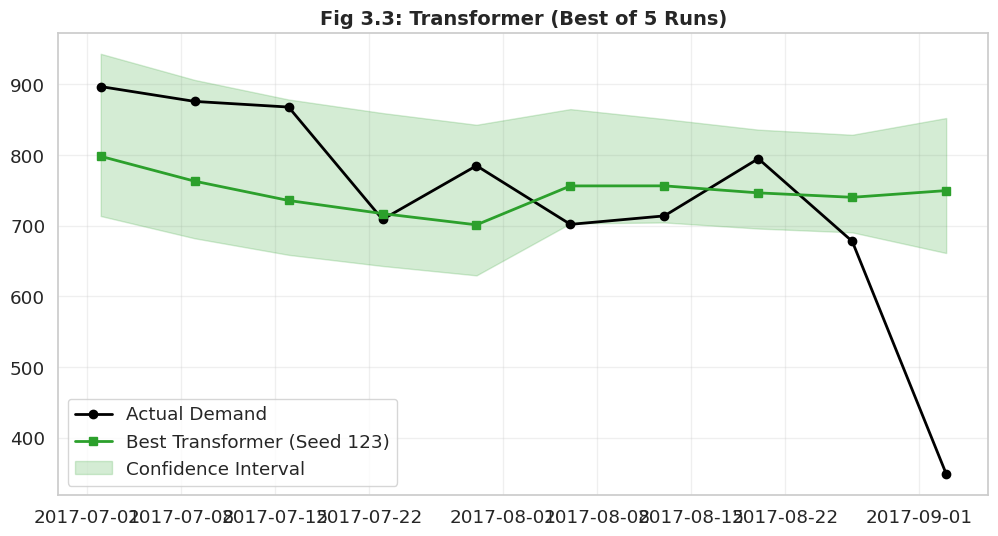

   FINAL METRICS REPORT
------------------------------
MAPE: 19.48%
RMSE: 147.87


/tmp/ipython-input-94718185.py:151: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=features, palette="viridis")


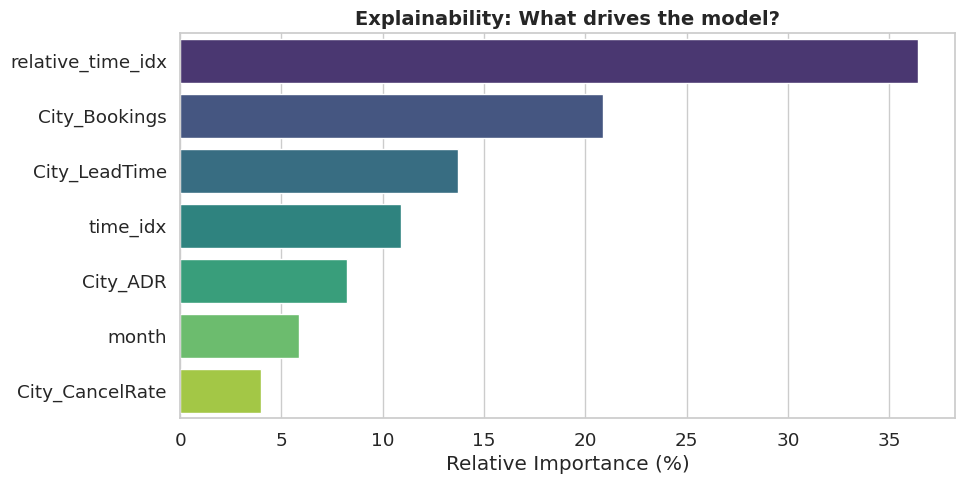

In [32]:
import pandas as pd
import numpy as np
import lightning.pytorch as pl
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import QuantileLoss
from lightning.pytorch.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import logging

# logs
logging.getLogger("lightning.pytorch").setLevel(logging.ERROR)

# Load data
df = pd.read_csv('weekly_hotel_split.csv')
df['date'] = pd.to_datetime(df['date'])
df['time_idx'] = range(len(df))
df['group'] = 'City'
df['month'] = df['date'].dt.month.astype(str)
df['City_Bookings'] = df['City_Bookings'].astype(float)

# Configuration
max_prediction_length = 10
max_encoder_length = 24
training_cutoff = df["time_idx"].max() - max_prediction_length

training = TimeSeriesDataSet(
    df[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="City_Bookings",
    group_ids=["group"],
    min_encoder_length=max_encoder_length // 2,
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    static_categoricals=["group"],
    time_varying_known_categoricals=["month"],
    time_varying_known_reals=["time_idx"],
    time_varying_unknown_reals=["City_Bookings", "City_ADR", "City_LeadTime", "City_CancelRate"],
    target_normalizer=GroupNormalizer(groups=["group"], transformation="softplus"),
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
)

validation = TimeSeriesDataSet.from_dataset(training, df, predict=True, stop_randomization=True)
batch_size = 32
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=0)

# Loop to find best transformer model and save to seed
seeds_to_test = [42, 123, 777, 2024, 88]
best_mape = float('inf')
best_seed = None
best_model_path = None

print(f"Starting Championship Search across {len(seeds_to_test)} seeds...")
print("-" * 50)

for seed in seeds_to_test:
    pl.seed_everything(seed)

    # Hyperparameters (The ones that worked before)
    tft = TemporalFusionTransformer.from_dataset(
        training,
        learning_rate=0.03,
        hidden_size=32,
        attention_head_size=4,
        dropout=0.1,
        hidden_continuous_size=16,
        output_size=7,
        loss=QuantileLoss(),
        log_interval=0,
        reduce_on_plateau_patience=4,
    )

    trainer = pl.Trainer(
        max_epochs=35,
        accelerator="auto",
        gradient_clip_val=0.1,
        callbacks=[EarlyStopping(monitor="val_loss", patience=10)],
        enable_model_summary=False, # Silence summary
        enable_progress_bar=False,  # Silence progress bar for speed
    )

    trainer.fit(tft, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)

    # Evaluate
    best_tft = TemporalFusionTransformer.load_from_checkpoint(
        trainer.checkpoint_callback.best_model_path, map_location='cpu', weights_only=False)
    raw_predictions = best_tft.predict(val_dataloader, mode="raw", return_x=True)
    median_forecast = raw_predictions.output.prediction.cpu().numpy()[0, :, 3]

    # Calculate Score
    actuals = df.iloc[-10:]['City_Bookings'].values
    mape = mean_absolute_percentage_error(actuals, median_forecast)

    print(f"Seed {seed}: MAPE = {mape:.2%}")

    if mape < best_mape:
        best_mape = mape
        best_seed = seed
        best_model_path = trainer.checkpoint_callback.best_model_path


print(f" Best Seed {best_seed} with MAPE is {best_mape:.2%}")


# Best model found. Display and plot forecast
best_tft = TemporalFusionTransformer.load_from_checkpoint(
    best_model_path, map_location='cpu', weights_only=False)
raw_predictions = best_tft.predict(val_dataloader, mode="raw", return_x=True)
predictions_numpy = raw_predictions.output.prediction.cpu().numpy()

median_forecast = predictions_numpy[0, :, 3]
lower_bound = predictions_numpy[0, :, 1]
upper_bound = predictions_numpy[0, :, 5]
dates = df.iloc[-10:]['date'].values
actuals = df.iloc[-10:]['City_Bookings'].values

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(dates, actuals, label='Actual Demand', color='black', marker='o', linewidth=2)
plt.plot(dates, median_forecast, label=f'Best Transformer (Seed {best_seed})', color='#2ca02c', marker='s', linewidth=2)
plt.fill_between(dates, lower_bound, upper_bound, color='#2ca02c', alpha=0.2, label='Confidence Interval')
plt.title(f'Fig 3.3: Transformer (Best of 5 Runs)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


rmse = np.sqrt(mean_squared_error(actuals, median_forecast))


print("   FINAL METRICS REPORT")
print("-"*30)
print(f"MAPE: {best_mape:.2%}")
print(f"RMSE: {rmse:.2f}")


# Plot Variable Importance
interpretation = best_tft.interpret_output(raw_predictions.output, reduction="sum")
encoder_importance = interpretation["encoder_variables"]
sorted_idx = encoder_importance.argsort(descending=True)
features = np.array(best_tft.encoder_variables)[sorted_idx]
scores = encoder_importance[sorted_idx].cpu().numpy()
scores = scores / scores.sum() * 100

plt.figure(figsize=(10, 5))
sns.barplot(x=scores, y=features, palette="viridis")
plt.title("Explainability: What drives the model?", fontsize=14, fontweight='bold')
plt.xlabel("Relative Importance (%)")
plt.show()


#Modelling Resort Hotel

In [36]:
# Install library
!pip install pmdarima

#Import libraries
import pmdarima as pm
import pandas as pd

# Load your data
df = pd.read_csv('weekly_hotel_split.csv')
df['date'] = pd.to_datetime(df['date'])
train = df.iloc[:-20] # Use only training data to find params

print("Starting Auto-ARIMA search...")

# Note: We set m=52 for weekly data.
sarima_model = pm.auto_arima(
    train['Resort_Bookings'],
    start_p=1, max_p=3,
    start_q=1, max_q=3,
    start_P=0, max_P=2,
    start_Q=0, max_Q=2,
    d=1,
    D=1,
    m=52,
    seasonal=True,
    stepwise=True,     # Smart search
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)

print("\nBest Model Found:")
print(sarima_model.summary())

Starting Auto-ARIMA search...
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[52]             : AIC=inf, Time=0.77 sec
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=506.035, Time=0.48 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=inf, Time=11.88 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=5.68 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=inf, Time=9.41 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=inf, Time=8.72 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=509.164, Time=13.48 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=498.832, Time=0.46 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=inf, Time=6.68 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=501.963, Time=14.97 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=500.148, Time=1.00 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=inf, Time=1.70 sec
 ARIMA(2,1,1)(0,1,0)[52]             : AIC=inf, Time=2.06 sec
 ARIMA(1,1,0)(0,1,0)[52] intercept   : AIC=500.829, Time=0.66 sec

Best model:  ARIMA(1,1,0)(0,1,0

Training SARIMA (Baseline)...


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


SARIMA MAPE (Error Rate): 19.75%
SARIMA RMSE: 93.49


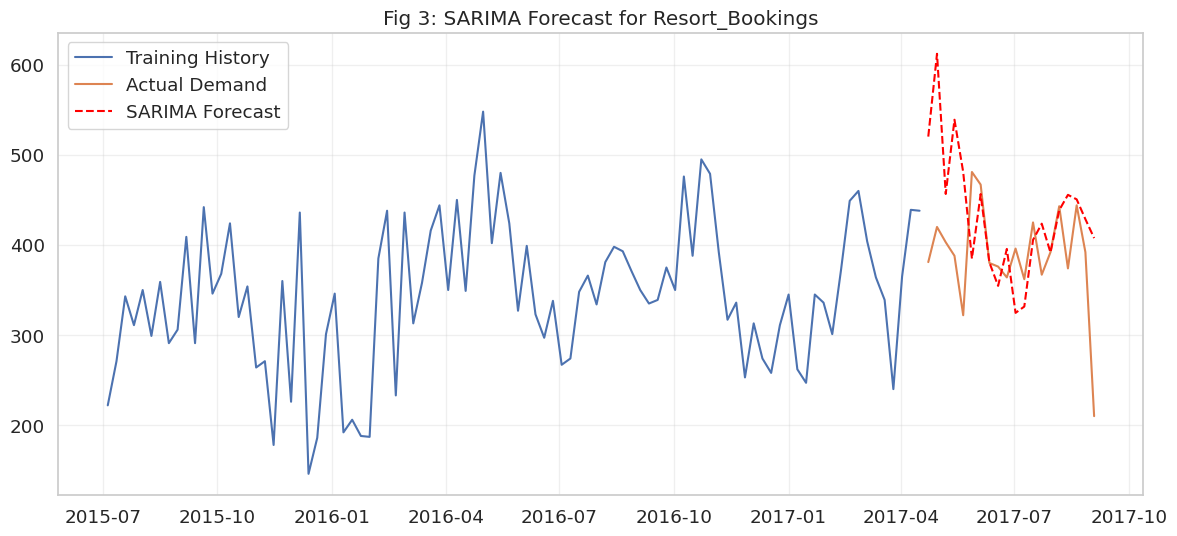

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Load split dataset
df = pd.read_csv('weekly_hotel_split.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Select Target (Resort Hotel)
#train/test split (Last 20 weeks for testing)
target_col = 'Resort_Bookings'
train = df.iloc[:-20]
test = df.iloc[-20:]

# Configure and Train SARIMA
# Use Best model:  ARIMA(1,1,0)(0,1,0)[52]
print("Training SARIMA (Baseline)...")
model = SARIMAX(train[target_col],
                order=(1, 1, 0),
                seasonal_order=(0, 1, 0, 52),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Forecast
# We predict the next 20 steps
forecast = results.get_forecast(steps=len(test))
predicted_mean = forecast.predicted_mean
predicted_mean.index = test.index  # Align dates

# Evaluation
mape = mean_absolute_percentage_error(test[target_col], predicted_mean)
rmse = np.sqrt(mean_squared_error(test[target_col], predicted_mean)) # Calculate RMSE
print(f"SARIMA MAPE (Error Rate): {mape:.2%}")
print(f"SARIMA RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(train.index, train[target_col], label='Training History')
plt.plot(test.index, test[target_col], label='Actual Demand')
plt.plot(test.index, predicted_mean, label='SARIMA Forecast', color='red', linestyle='--')
plt.title(f'Fig 3: SARIMA Forecast for {target_col}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Training SARIMAX (Linear Multivariate)...


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


SARIMAX MAPE: 23.67%
SARIMAX RMSE: 103.62


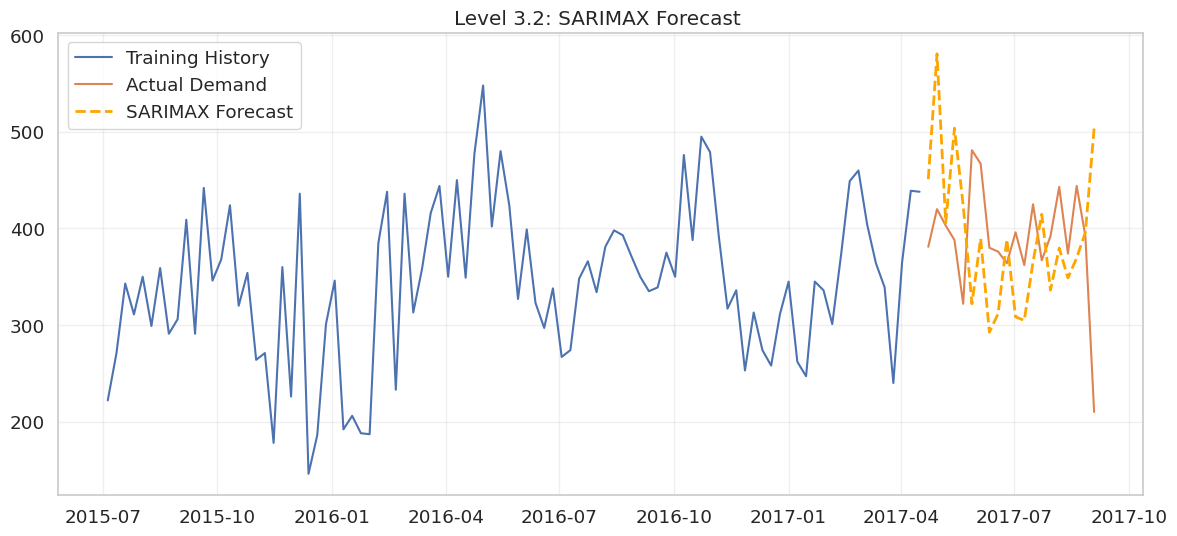


Model Coefficients (Linear Elasticity):
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Resort_ADR          4.0498      1.807      2.241      0.025       0.508       7.591
Resort_LeadTime    -0.2071      0.687     -0.302      0.763      -1.553       1.139
ar.L1              -0.4914      0.183     -2.686      0.007      -0.850      -0.133
sigma2           8798.9891   2715.754      3.240      0.001    3476.209    1.41e+04


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Load Data
df = pd.read_csv('weekly_hotel_split.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Configure SARIMAX
# Target: Resort_Bookings
# Exogenous: Resort_ADR (Price), Resort_LeadTime (Planning)
target_col = 'Resort_Bookings'
exog_cols = ['Resort_ADR', 'Resort_LeadTime']

# Train/Test Split
train = df.iloc[:-20]
test = df.iloc[-20:]

# Train SARIMAX

print("Training SARIMAX (Linear Multivariate)...")
model = SARIMAX(train[target_col],
                exog=train[exog_cols],
                order=(1, 1, 0),
                seasonal_order=(0, 1, 0, 52),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Forecast

forecast = results.get_forecast(steps=len(test), exog=test[exog_cols])
predicted_mean = forecast.predicted_mean
predicted_mean.index = test.index

# Evaluate
mape = mean_absolute_percentage_error(test[target_col], predicted_mean)
rmse = np.sqrt(mean_squared_error(test[target_col], predicted_mean))

print(f"SARIMAX MAPE: {mape:.2%}")
print(f"SARIMAX RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(train.index, train[target_col], label='Training History')
plt.plot(test.index, test[target_col], label='Actual Demand')
plt.plot(test.index, predicted_mean, label='SARIMAX Forecast', color='orange', linestyle='--', linewidth=2)
plt.title(f'Level 3.2: SARIMAX Forecast ')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print Coefficients (To show Linear Price Elasticity)
print("\nModel Coefficients (Linear Elasticity):")
print(results.summary().tables[1])

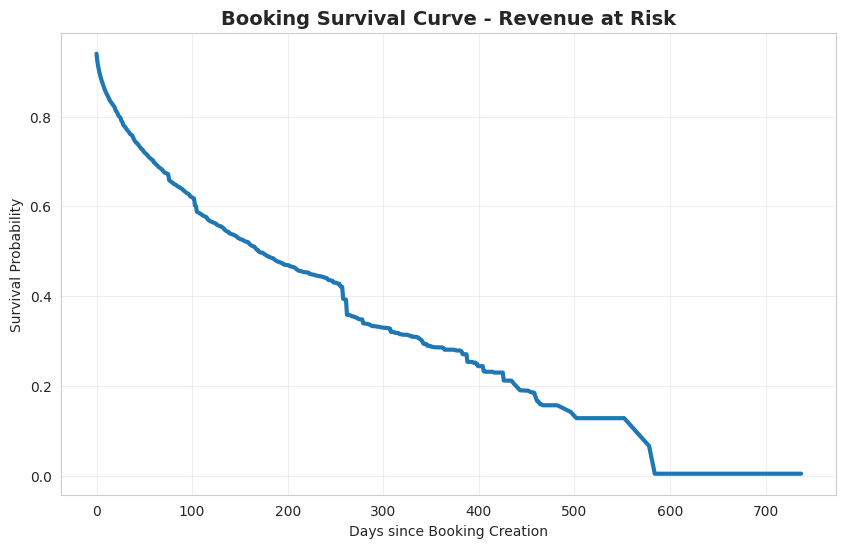

------------------------------
Strategic Segment Definitions:
------------------------------
                   adr   lead_time  total_stay
Cluster_ID                                    
0            87.312577  237.124013    4.707798
1            78.380003   45.572561    2.541041
2           164.110199   69.816679    3.648507

Mapping Applied: {np.int32(2): 'High value customers', np.int32(0): 'Low risk', np.int32(1): 'High risk'}


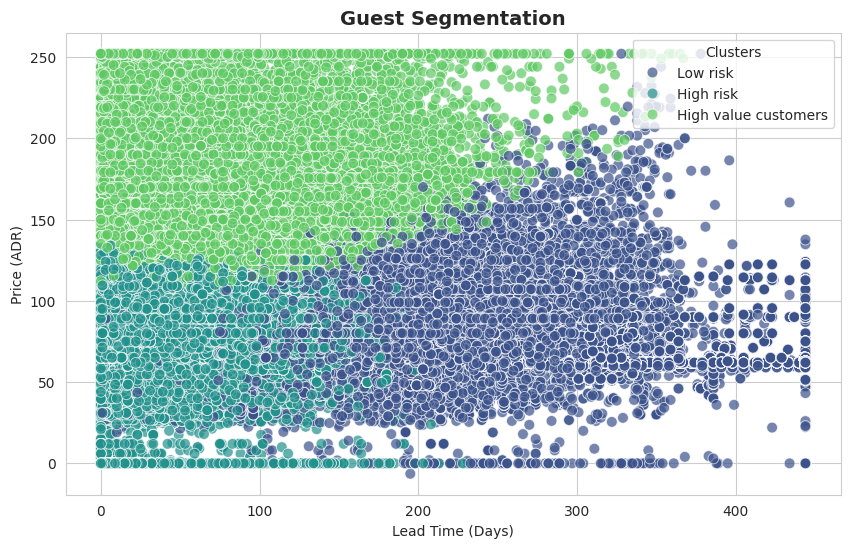

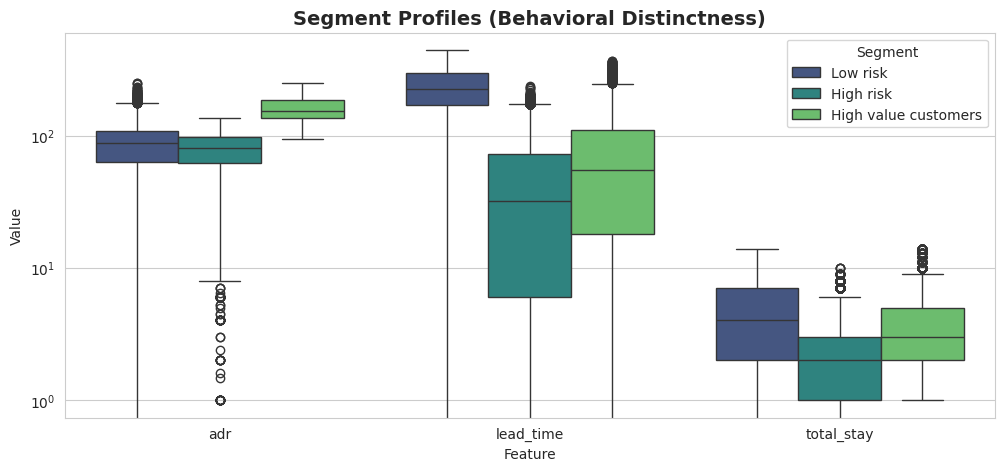

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Load data
df = pd.read_csv('hotel_bookings.csv')

#Remove Data Errors
df = df[df['adr'] < 5000].copy()
df = df[df['adults'] > 0].copy()

# USE CASE B: SURVIVAL ANALYSIS

# Data Preparation
month_map = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
             'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df['month_num'] = df['arrival_date_month'].map(month_map)
df['arrival_date'] = pd.to_datetime(df.assign(year=df['arrival_date_year'],
                                              month=df['month_num'],
                                              day=df['arrival_date_day_of_month'])[['year', 'month', 'day']])
df['booking_date'] = df['arrival_date'] - pd.to_timedelta(df['lead_time'], unit='D')
df['status_date'] = pd.to_datetime(df['reservation_status_date'])

df['duration'] = (df['status_date'] - df['booking_date']).dt.days
df = df[df['duration'] >= 0]
df['event'] = df['is_canceled']

# Custom KM Function
def calculate_survival(data):
    summary = data.groupby('duration').agg({'event': 'sum', 'hotel': 'count'}).rename(columns={'hotel': 'n_at_risk'})
    summary = summary.sort_index()
    summary['n_at_risk'] = data['duration'].count() - summary['n_at_risk'].shift(1).fillna(0).cumsum()
    summary['hazard'] = summary['event'] / summary['n_at_risk']
    summary['survival'] = (1 - summary['hazard']).cumprod()
    return summary

# Survival Curve
km_all = calculate_survival(df)
plt.figure(figsize=(10, 6))
plt.plot(km_all.index, km_all['survival'], color='#1f77b4', linewidth=3)
plt.title('Booking Survival Curve - Revenue at Risk', fontsize=14, fontweight='bold')
plt.xlabel('Days since Booking Creation')
plt.ylabel('Survival Probability')
plt.grid(True, alpha=0.3)
plt.show()

# USE CASE C: SEGMENTATION

# Feature Engineering
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
features = df[['adr', 'lead_time', 'total_stay']].copy()

# We cap at 99th percentile to keep VIP guests
for col in features.columns:
    cap_value = features[col].quantile(0.99)
    features.loc[features[col] > cap_value, col] = cap_value

# Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
features['Cluster_ID'] = kmeans.fit_predict(X_scaled)


# We analyze the cluster centers to figure out which ID is which cluster
cluster_means = features.groupby('Cluster_ID').mean()

# VIP/High value (Highest ADR)
vip_id = cluster_means['adr'].idxmax()

# Identify Planner / Low Risk (Longest Lead Time)
remaining = cluster_means.drop(vip_id)
planner_id = remaining['lead_time'].idxmax()

# Transient / Hugh risk
transient_id = list(set(features['Cluster_ID'].unique()) - {vip_id, planner_id})[0]

# Create the Map
label_map = {
    vip_id: 'High value customers',
    planner_id: 'Low risk',
    transient_id: 'High risk'
}

# Apply Labels
features['Segment'] = features['Cluster_ID'].map(label_map)

print("-" * 30)
print("Strategic Segment Definitions:")
print("-" * 30)
print(cluster_means)
print("\nMapping Applied:", label_map)

# Cluster Map
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lead_time', y='adr', hue='Segment', data=features, palette='viridis', alpha=0.7, s=60)
plt.title('Guest Segmentation', fontsize=14, fontweight='bold')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Price (ADR)')
plt.legend(title='Clusters')
plt.show()

# Labels
features_melt = features.melt(id_vars='Segment', value_vars=['adr', 'lead_time', 'total_stay'], var_name='Feature', value_name='Value')

plt.figure(figsize=(12, 5))
sns.boxplot(x='Feature', y='Value', hue='Segment', data=features_melt, palette='viridis')
plt.title('Segment Profiles (Behavioral Distinctness)', fontsize=14, fontweight='bold')
plt.yscale('log')
plt.show()

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)